# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bagging & Boosting Methods Capstone Project (Titanic Prediction)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

![image.png](attachment:image.png)

Makine öğrenmesi dünyasının meşhur problemi (bir proje) olan Titanic data seti ile tanışmaya hoş geldiniz arkadaşlar. Bu projemiz bir Kaggle Projesi olup sıklıkla kullanılan bir gerçek dünya data setidir. Data seti ile ilgili açıklamaya alttaki linkten ulaşabilirsiniz.

https://www.kaggle.com/c/titanic/overview

Bu problemde amacımız https://www.kaggle.com/c/titanic/overview linkindeki görevi yerine getirmek.

**Önemli Not:** Kaggle yarışmalarında bazen data,
* train data
* test data
olarak ayrı verilir.

Buradaki test data bizim model oluştururken kullanacağımız test data değildir.

Bu test data Kaggle'in yarışma sonuçları test etmek için kullandığı datadır.

Dolayısı ile bu test data içinde target variable yani gerçek label değeri (grand truth) bulunmaz.

Bu sebeple kendi model doğruluğumuzu ölçerken bu test datayı kullanamayacağınızdan mevcut train data ile train_test_split yaparak kendi test datanızı oluşturmayı unutmayın!

**Here's an explanation of the features typically found in the Titanic dataset:**

**PassengerId:** A unique identifier for each passenger.

**Survived:** Indicates whether the passenger survived or not (0 = No, 1 = Yes).

**Pclass:** The passenger class (1st, 2nd, or 3rd).

**Name:** The name of the passenger.

**Sex:** The gender of the passenger (male or female).

**Age:** The age of the passenger.

**SibSp:** Number of siblings/spouses aboard the Titanic.

**Parch:** Number of parents/children aboard the Titanic.

**Ticket:** Ticket number.

**Fare:** The fare paid by the passenger.

**Cabin:** Cabin number.

**Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# ---------------------------- Titanic - Machine Learning from Disaster-----------------------------

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.pipeline import Pipeline

from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import make_scorer

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read Data

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df_copy = df.copy()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
whole_df = pd.read_csv("gender_submission.csv")
whole_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

# Exploratory Data Analysis (EDA)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop("Name", axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,male,26.000,0,0,111369,30.000,C148,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_values}")

Number of unique values in column 'PassengerId': 891
Number of unique values in column 'Survived': 2
Number of unique values in column 'Pclass': 3
Number of unique values in column 'Name': 891
Number of unique values in column 'Sex': 2
Number of unique values in column 'Age': 88
Number of unique values in column 'SibSp': 7
Number of unique values in column 'Parch': 7
Number of unique values in column 'Ticket': 681
Number of unique values in column 'Fare': 248
Number of unique values in column 'Cabin': 147
Number of unique values in column 'Embarked': 3


In [ ]:
null_counts = {}
for column in df.columns:
    null_values = df[column].isnull().sum()
    if null_values > 0:
        null_counts[column] = null_values

print(f"columns with null values: {null_counts}")

columns with null values: {'Age': 177, 'Cabin': 687, 'Embarked': 2}


In [ ]:
cf.go_offline()
df.iloc[:,1:].iplot(kind="box");

In [ ]:
species_count = df['Survived'].value_counts().reset_index()
species_count.columns = ['Survived', 'count']

fig = px.bar(species_count, x='Survived', y='count', text='count', color='Survived')

fig.update_traces(texttemplate='%{text}', textposition='outside')

# ax = sns.countplot(x="class", data=df)
# ax.bar_label(ax.containers[0]);

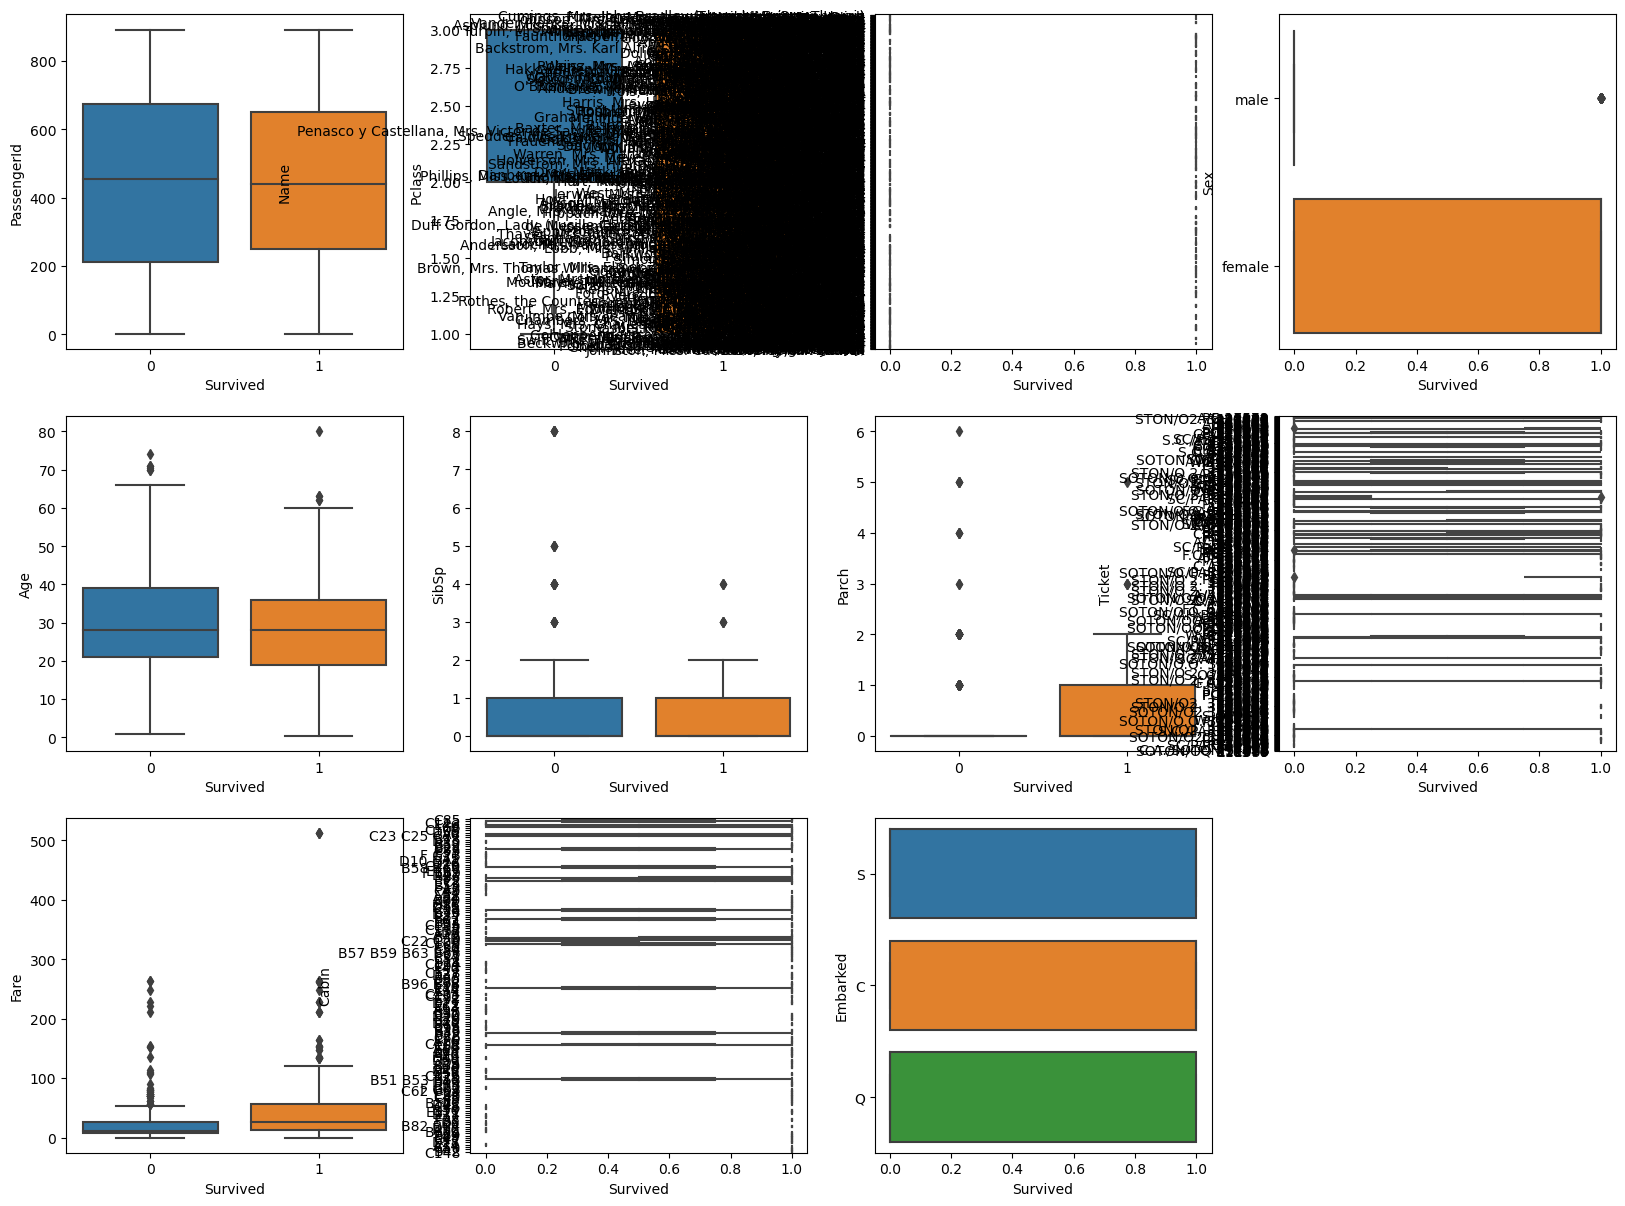

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Survived":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='Survived',y=feature,data=df)
plt.show()

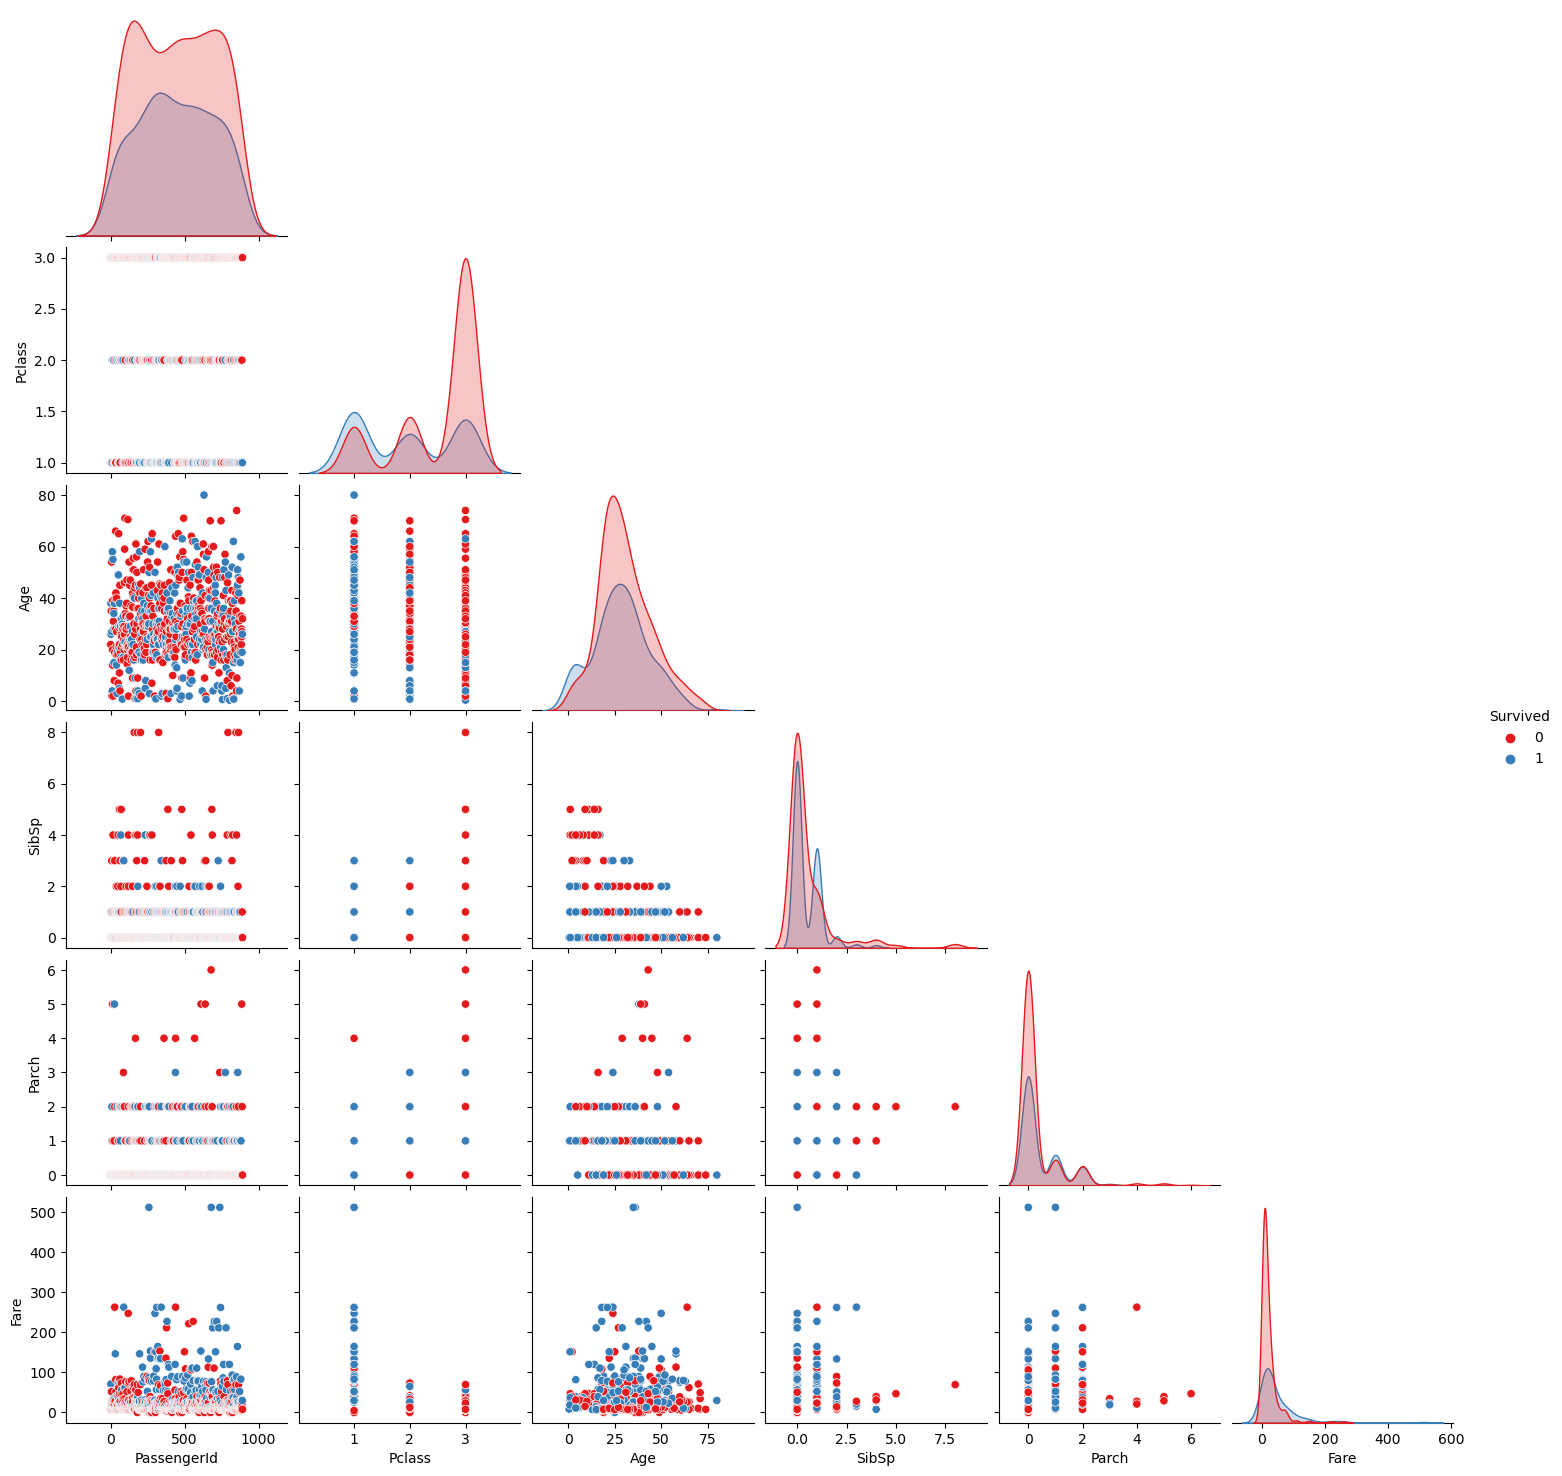

In [ ]:
sns.pairplot(df, hue='Survived', palette="Set1", corner=True);

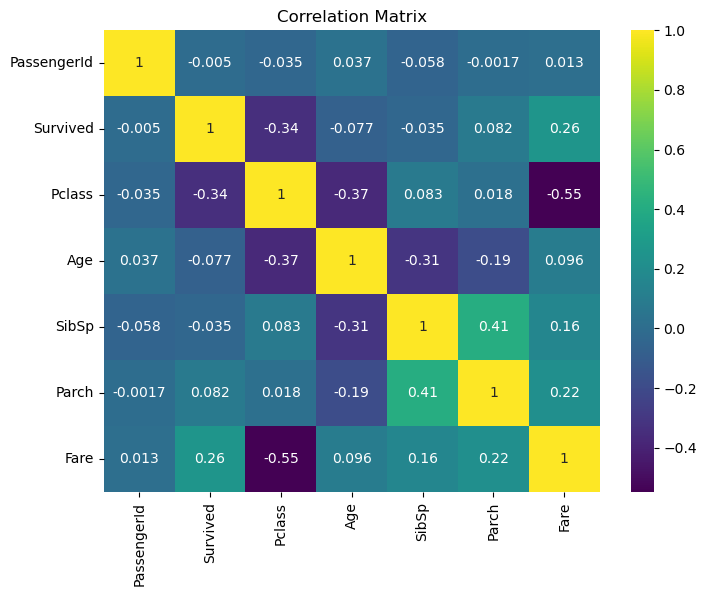

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['Survived'].value_counts(normalize=True)

0   0.616
1   0.384
Name: Survived, dtype: float64

In [ ]:
# Veri setindeki yinelenen gözlemleri kontrol eder ve bunları kaldırır

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [ ]:
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [ ]:
df['Pclass'].value_counts(normalize=True)

3   0.551
1   0.242
2   0.207
Name: Pclass, dtype: float64

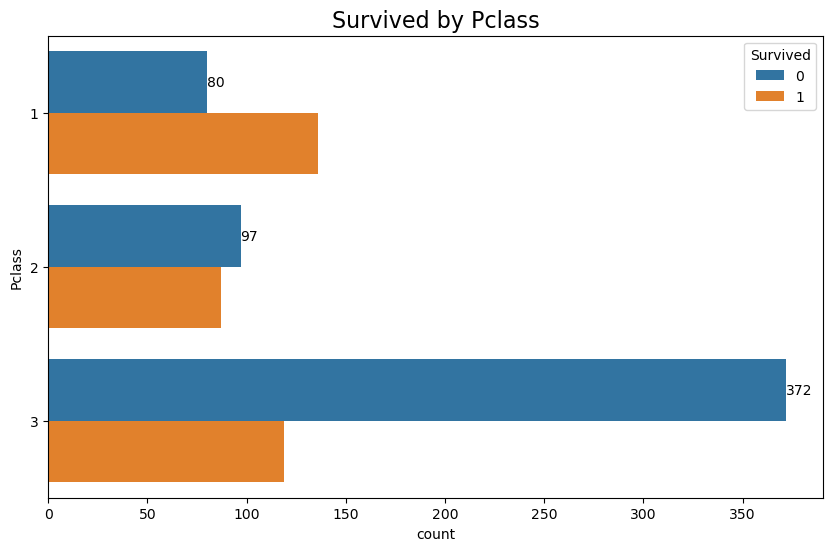

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Pclass'], hue = df['Survived'])
plt.title("Survived by Pclass", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [ ]:
df['Sex'].value_counts(normalize=True)

male     0.648
female   0.352
Name: Sex, dtype: float64

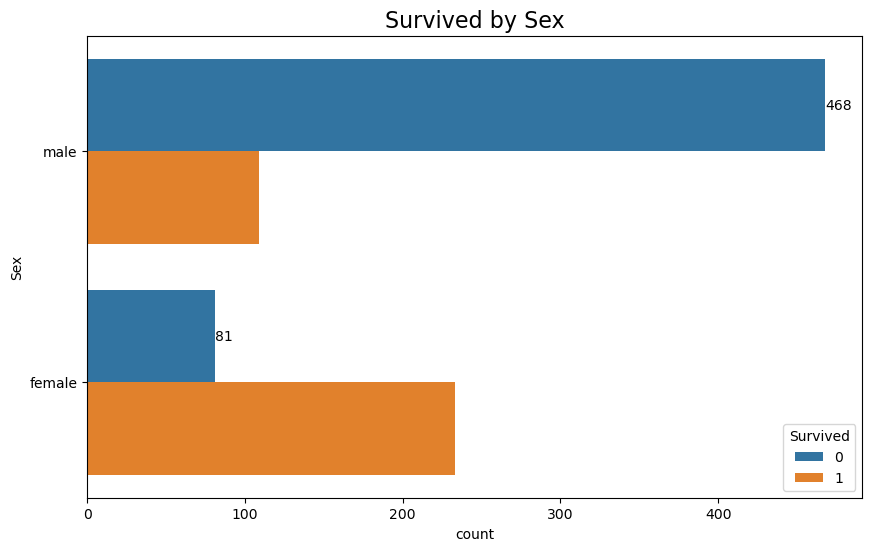

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['Sex'], hue = df['Survived'])
plt.title("Survived by Sex", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [ ]:
filtered_df = df[df['Age'] < 40 ]
age_counts = filtered_df['Age'].value_counts().sum()
print(age_counts)

551


In [ ]:
filtered_df = df[df['Age'] < 15 ]
age_counts = filtered_df['Age'].value_counts().sum()
print(age_counts)

78


In [ ]:
df.shape

(891, 12)

In [ ]:
df.Age.isnull().sum()

177

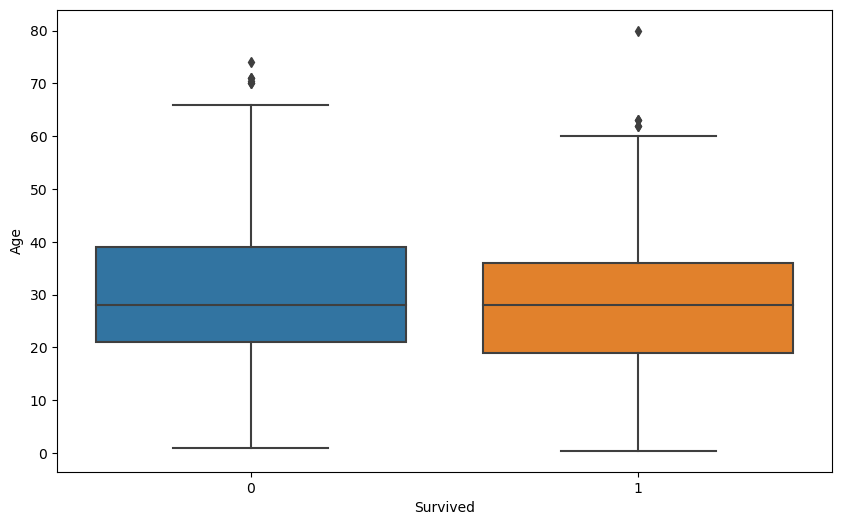

In [ ]:
 sns.boxplot(data=df,y="Age",x='Survived');

In [ ]:
px.histogram(df, x='Age', color="Survived", barmode='group', title='Survived by Age')

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df.Age.isnull().sum()

0

In [ ]:
px.histogram(df, x='Age', color="Survived", barmode='group', title='Survived by Age')

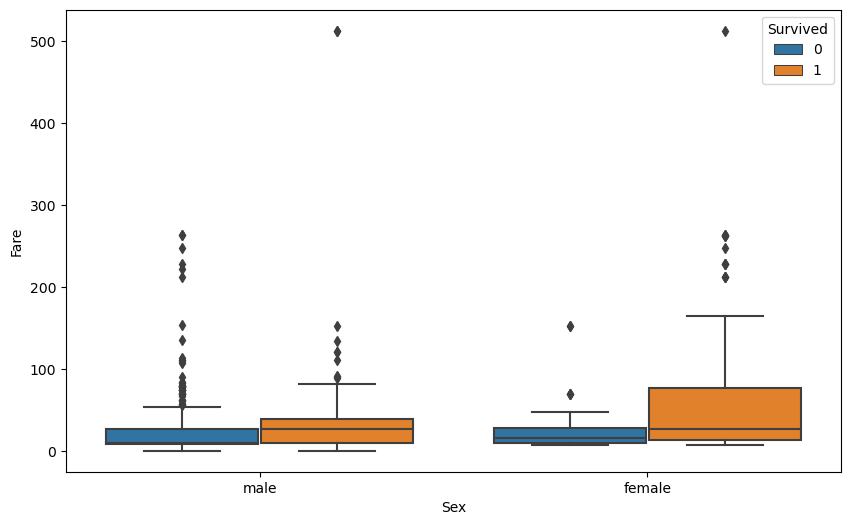

In [ ]:
 sns.boxplot(data=df,x="Sex",y='Fare', hue='Survived');

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Veri setindeki belirli bir sütunundaki değerlerin dağılımını hızlıca incelemek için

def value_cnt(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)

    return df_result
value_cnt(df, 'Parch')

,Parch,counts,norm_counts
0,0,678,0.761
1,1,118,0.132
2,2,80,0.090
3,5,5,0.006
4,3,5,0.006
5,4,4,0.004
6,6,1,0.001


In [ ]:
px.histogram(df, x='Parch', color="Survived", barmode='group', title='Survived by Age')

In [ ]:
value_cnt(df, 'SibSp')

,SibSp,counts,norm_counts
0,0,608,0.682
1,1,209,0.235
2,2,28,0.031
3,4,18,0.020
4,3,16,0.018
5,8,7,0.008
6,5,5,0.006


In [ ]:
px.histogram(df, x='SibSp', color="Survived", barmode='group', title='Survived by Age')

In [ ]:
df.Embarked.isnull().sum()

2

In [ ]:
df.dropna(subset=['Embarked'], inplace=True)

In [ ]:
df.Embarked.isnull().sum()

0

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S


In [ ]:
df.drop(columns=['Name'], inplace=True)

In [ ]:
df.drop(columns=['Ticket'], inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000,1,0,7.250,S
1,2,1,1,female,38.000,1,0,71.283,C
2,3,1,3,female,26.000,0,0,7.925,S
3,4,1,1,female,35.000,1,0,53.100,S
4,5,0,3,male,35.000,0,0,8.050,S


In [ ]:
df.Embarked.nunique()

3

In [ ]:
df.shape

(889, 9)

In [ ]:
df.to_csv('titanic_data_EDA.csv', index=False)

NameError: name 'df' is not defined

In [ ]:
df = pd.read_csv('titanic_data_EDA.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000,1,0,7.250,S
1,2,1,1,female,38.000,1,0,71.283,C
2,3,1,3,female,26.000,0,0,7.925,S
3,4,1,1,female,35.000,1,0,53.100,S
4,5,0,3,male,35.000,0,0,8.050,S


# Train | Test Split

In [ ]:
X= df.drop(columns="Survived")
y= df.Survived

In [ ]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000,1,0,7.250,S
1,2,1,female,38.000,1,0,71.283,C
2,3,3,female,26.000,0,0,7.925,S
3,4,1,female,35.000,1,0,53.100,S
4,5,3,male,35.000,0,0,8.050,S


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value',
                                                       unknown_value=-1), ['Sex', 'Embarked']),
                                                          remainder='passthrough')

In [ ]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
719,721,2,female,6.000,0,1,33.000,S
306,308,1,female,17.000,1,0,108.900,C
140,142,3,female,22.000,0,0,7.750,S
592,594,3,female,29.699,0,2,7.750,Q
242,244,3,male,22.000,0,0,7.125,S


# Modelling | Model Performance

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
operations = [('column_trans',column_trans), ('RF_model', RandomForestClassifier(random_state=101))]
RF_pipe = Pipeline(steps= operations)

In [ ]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [ ]:
y_pred = RF_pipe.predict(X_test)
RF_f1 = f1_score(y_test, y_pred)
RF_accuracy = accuracy_score(y_test, y_pred)
RF_auc = roc_auc_score(y_test, y_pred)

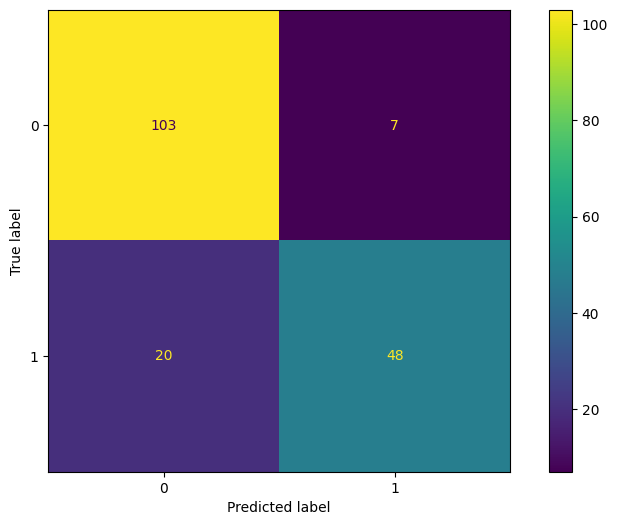

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_pipe, X_test, y_test);

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(RF_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[103   7]
 [ 20  48]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
           1       0.87      0.71      0.78        68

    accuracy                           0.85       178
   macro avg       0.86      0.82      0.83       178
weighted avg       0.85      0.85      0.84       178


Train_Set
[[439   0]
 [  0 272]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       272

    accuracy                           1.00       711
   macro avg       1.00      1.00      1.00       711
weighted avg       1.00      1.00      1.00       711



### Random Forest CV

In [ ]:
operations = [('column_trans',column_trans), ('RF_model', RandomForestClassifier(random_state=101))]
RF_pipe = Pipeline(steps= operations)

scores = cross_validate(RF_pipe, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.811
train_accuracy          1.000
test_precision_macro    0.807
train_precision_macro   1.000
test_recall_macro       0.792
train_recall_macro      1.000
test_f1_macro           0.795
train_f1_macro          1.000
dtype: float64

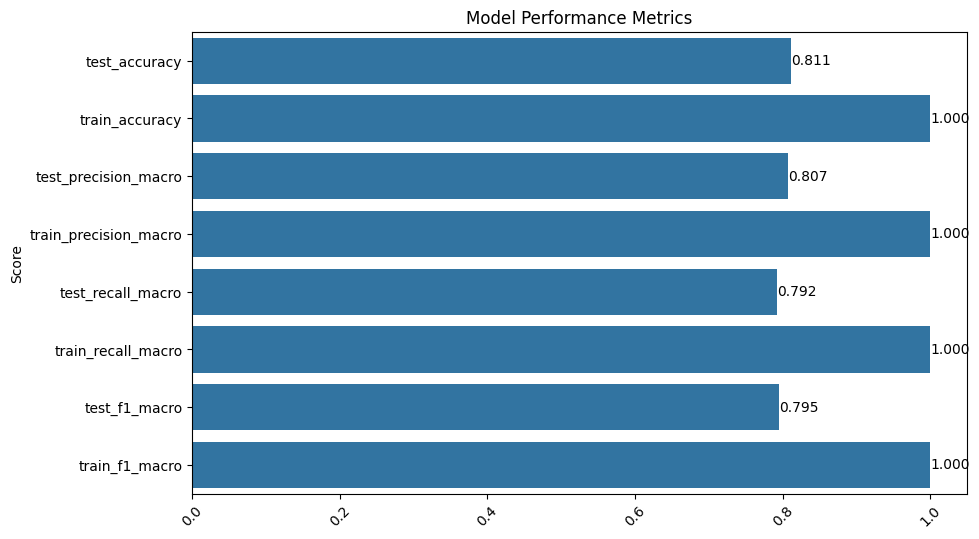

In [ ]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

### Random Forest Grid Search

In [ ]:
RF_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Sex', 'Embarked'])])),
  ('RF_model', RandomForestClassifier(random_state=101))],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['Sex', 'Embarked'])]),
 'RF_model': RandomForestClassifier(random_state=101),
 'column_trans__n_jobs': None,
 'column_trans__remainder': 'passthrough',
 'column_trans__sparse_threshold': 0.3,
 'column_trans__transformer_weights': None,
 'column_trans__transfo

In [ ]:
param_grid = {'RF_model__n_estimators':[64, 128],
             'RF_model__max_features':[4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4, 5],
             'RF_model__min_samples_split':[2,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]}

In [ ]:
operations = [('column_trans',column_trans), ('RF_model', RandomForestClassifier(random_state=101))]
RF_pipe = Pipeline(steps= operations)

RF_grid = GridSearchCV(RF_pipe, param_grid, scoring = "accuracy", n_jobs = -1)

RF_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4, 5],
                         'RF_model__max_features': [4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 4],
                         'RF_model__n_estimators': [64, 128]},
             scoring='accuracy')

In [ ]:
eval_metric(RF_grid, X_train, y_train, X_test, y_test)

Test_Set
[[104   6]
 [ 21  47]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       110
           1       0.89      0.69      0.78        68

    accuracy                           0.85       178
   macro avg       0.86      0.82      0.83       178
weighted avg       0.85      0.85      0.84       178


Train_Set
[[407  32]
 [ 65 207]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       439
           1       0.87      0.76      0.81       272

    accuracy                           0.86       711
   macro avg       0.86      0.84      0.85       711
weighted avg       0.86      0.86      0.86       711



In [ ]:
RF_grid.best_estimator_

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('RF_model',
                 RandomForestClassifier(max_depth=5, max_features=4,
                                        max_samples=0.8, min_samples_leaf=4,
                                        n_estimators=128, random_state=101))])

In [ ]:
RF_grid.best_params_

{'RF_model__max_depth': 5,
 'RF_model__max_features': 4,
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 4,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 128}

### Grid - CV

In [ ]:
operations = [('column_trans',column_trans), ('RF_model', RandomForestClassifier(max_depth=5,
                                                                                 max_features=4,
                                                                                 max_samples=0.8,
                                                                                 min_samples_leaf=4,
                                                                                 min_samples_split=2,
                                                                                 n_estimators=128,
                                                                                 random_state=101))]
RF_pipe = Pipeline(steps= operations)

scores = cross_validate(RF_pipe, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.804
train_accuracy          0.860
test_precision_macro    0.806
train_precision_macro   0.863
test_recall_macro       0.779
train_recall_macro      0.839
test_f1_macro           0.784
train_f1_macro          0.847
dtype: float64

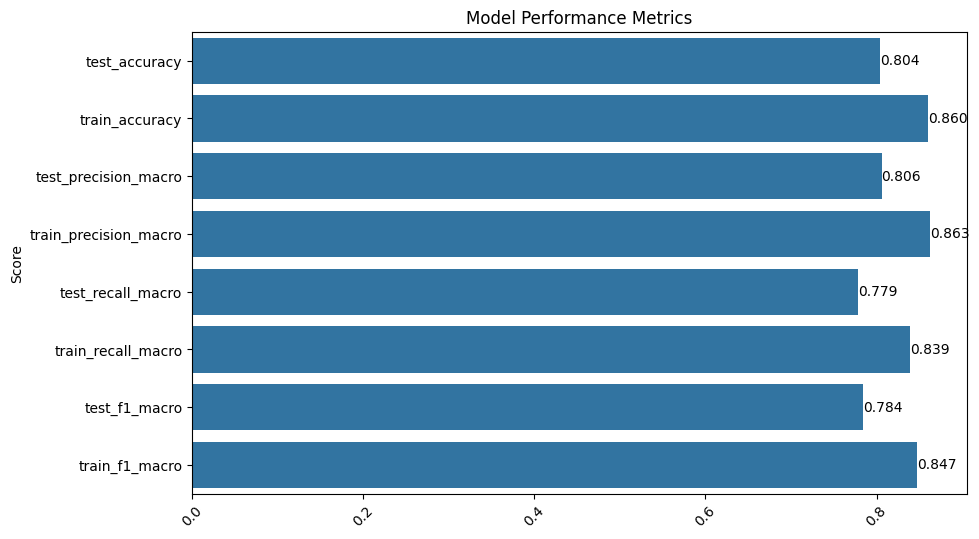

In [ ]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

### Random Forest Best Score

In [ ]:
RF_grid.best_score_

0.8128927410617551

### Random Forest Feature Importance

In [ ]:
operations = [('column_trans',column_trans), ('RF_model', RandomForestClassifier(max_depth=5,
                                                                                 max_features=4,
                                                                                 max_samples=0.8,
                                                                                 min_samples_leaf=4,
                                                                                 min_samples_split=2,
                                                                                 n_estimators=128,
                                                                                 random_state=101))]
RF_pipe = Pipeline(steps= operations)
RF_pipe.fit(X_train, y_train)

RF_pipe['RF_model'].feature_importances_

array([0.47693276, 0.0130225 , 0.07216612, 0.13869512, 0.08588691,
       0.03131116, 0.02067185, 0.16131358])

In [ ]:
feats = pd.DataFrame(index=X.columns, data= RF_pipe['RF_model'].feature_importances_, columns=['RF_importance'])
RF_imp_feats = feats.sort_values("RF_importance", ascending = False)
RF_imp_feats

,RF_importance
PassengerId,0.477
Embarked,0.161
Age,0.139
SibSp,0.086
Sex,0.072
Parch,0.031
Fare,0.021
Pclass,0.013


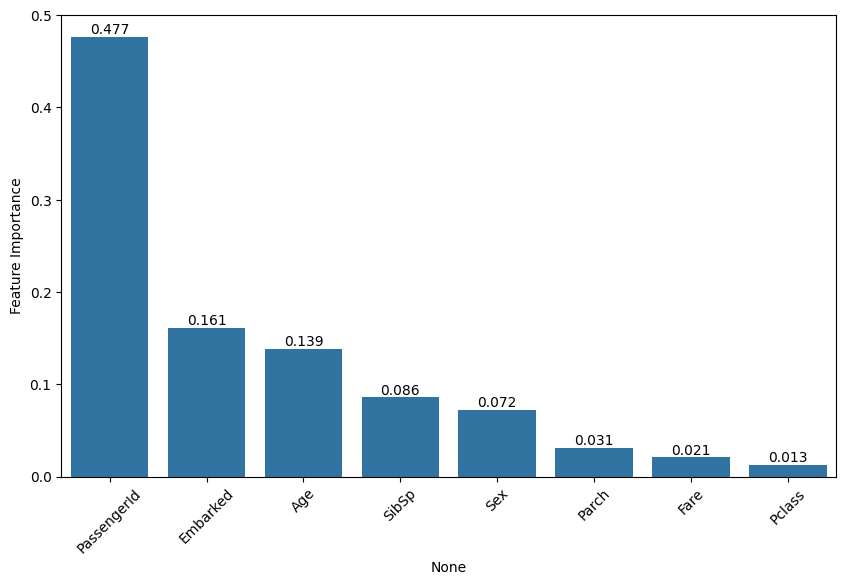

In [ ]:
df_fi = pd.DataFrame(data = RF_pipe["RF_model"].feature_importances_, index =X.columns,
                              columns = ["Feature Importance"])

df_fi = df_fi.sort_values("Feature Importance", ascending = False)

ax =sns.barplot(x = df_fi.index, y = 'Feature Importance', data = df_fi)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 45)
plt.show();

### Random Forest Roc Curve

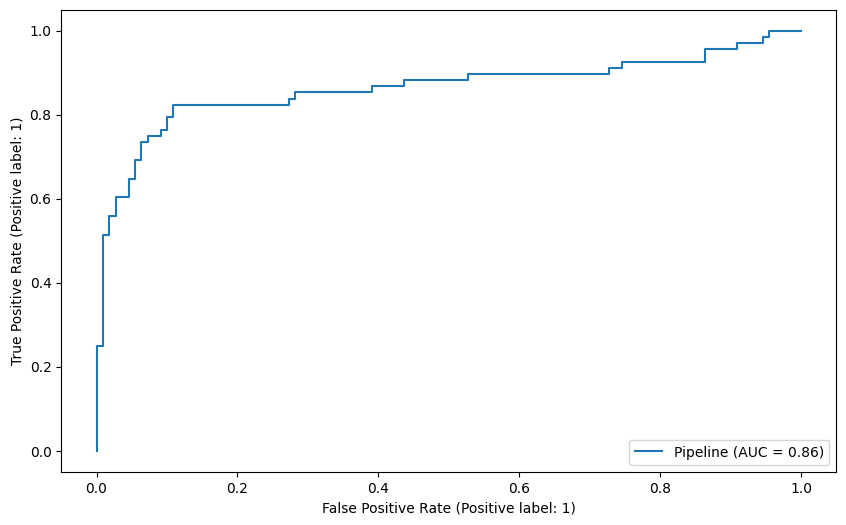

In [ ]:
RocCurveDisplay.from_estimator(RF_pipe, X_test, y_test);

## AdaBoost

In [ ]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value',
                                                       unknown_value=-1), ['Sex', 'Embarked']),
                                                          remainder='passthrough')

operations = [('column_trans',column_trans), ('ada_model', AdaBoostClassifier(random_state=101, n_estimators=50))]
ada_pipe = Pipeline(steps= operations)
#base_estimator=DecisionTreeClassifier(max_depth=1)

In [ ]:
ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('ada_model', AdaBoostClassifier(random_state=101))])

In [ ]:
y_pred = ada_pipe.predict(X_test)
ada_f1 = f1_score(y_test, y_pred)
ada_accuracy = accuracy_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)

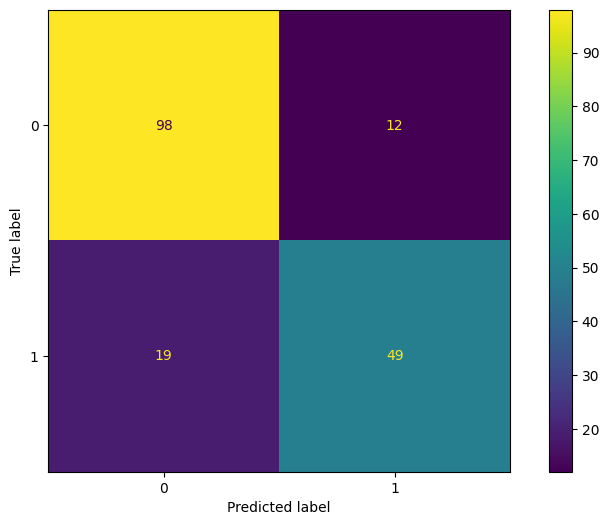

In [ ]:
ConfusionMatrixDisplay.from_estimator(ada_pipe, X_test, y_test);

In [ ]:
eval_metric(ada_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[98 12]
 [19 49]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.80      0.72      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178


Train_Set
[[398  41]
 [ 71 201]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       439
           1       0.83      0.74      0.78       272

    accuracy                           0.84       711
   macro avg       0.84      0.82      0.83       711
weighted avg       0.84      0.84      0.84       711



### AdaBoost CV

In [ ]:
operations = [('column_trans',column_trans), ('ada_model', AdaBoostClassifier(random_state=101, n_estimators=50))]
ada_pipe = Pipeline(steps= operations)

scores = cross_validate(ada_pipe, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.782
train_accuracy          0.843
test_precision_macro    0.772
train_precision_macro   0.837
test_recall_macro       0.768
train_recall_macro      0.828
test_f1_macro           0.767
train_f1_macro          0.832
dtype: float64

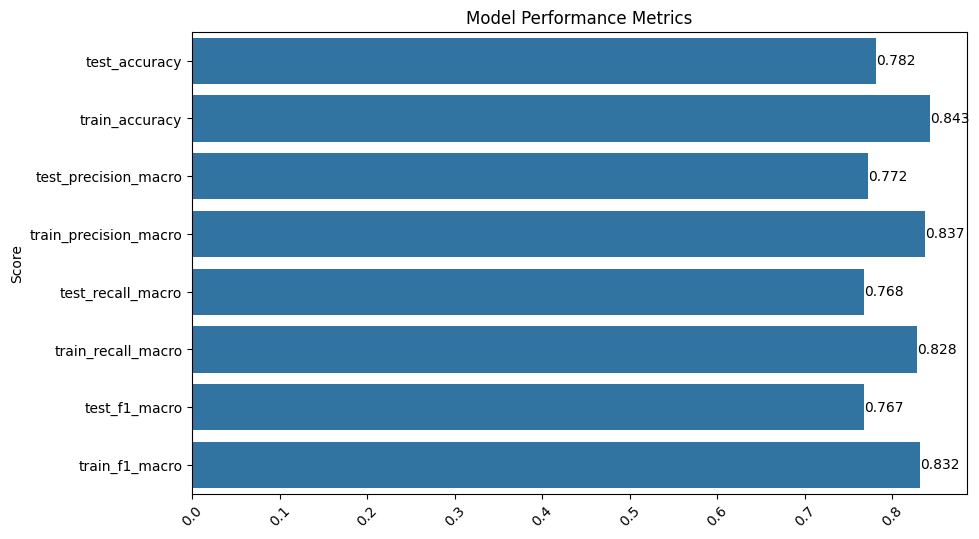

In [ ]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

### AdaBoost Grid Search

In [ ]:
ada_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Sex', 'Embarked'])])),
  ('ada_model', AdaBoostClassifier(random_state=101))],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['Sex', 'Embarked'])]),
 'ada_model': AdaBoostClassifier(random_state=101),
 'column_trans__n_jobs': None,
 'column_trans__remainder': 'passthrough',
 'column_trans__sparse_threshold': 0.3,
 'column_trans__transformer_weights': None,
 'column_trans__transformers'

In [ ]:
param_grid = {
    "ada_model__n_estimators": [50, 100, 200],
    "ada_model__learning_rate": [0.01, 0.1, 0.5, 1]
}

In [ ]:
operations = [('column_trans',column_trans), ('ada_model', AdaBoostClassifier(random_state=101, n_estimators=50))]
ada_pipe = Pipeline(steps= operations)

ada_grid = GridSearchCV(ada_pipe, param_grid, scoring = "accuracy", n_jobs = -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('ada_model',
                                        AdaBoostClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'ada_model__learning_rate': [0.01, 0.1, 0.5, 1],
                         'ada_model__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
eval_metric(ada_grid, X_train, y_train, X_test, y_test)

Test_Set
[[97 13]
 [17 51]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.77        68

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178


Train_Set
[[380  59]
 [ 78 194]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.77      0.71      0.74       272

    accuracy                           0.81       711
   macro avg       0.80      0.79      0.79       711
weighted avg       0.81      0.81      0.81       711



In [ ]:
ada_grid.best_params_

{'ada_model__learning_rate': 0.1, 'ada_model__n_estimators': 100}

In [ ]:
ada_grid.best_estimator_

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('ada_model',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                    random_state=101))])

### Grid CV

In [ ]:
operations = [('column_trans',column_trans), ('ada_model', AdaBoostClassifier(random_state=101, n_estimators=50))]
ada_pipe_CV = Pipeline(steps= operations)

scores = cross_validate(ada_pipe_CV, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.782
train_accuracy          0.843
test_precision_macro    0.772
train_precision_macro   0.837
test_recall_macro       0.768
train_recall_macro      0.828
test_f1_macro           0.767
train_f1_macro          0.832
dtype: float64

### AdaBoost Best Score

In [ ]:
ada_grid.best_score_

0.797478577760268

### AdaBoost Feature Importances

In [ ]:
operations = [('column_trans',column_trans), ('ada_model', AdaBoostClassifier(random_state=101,
                                                                              n_estimators=100,
                                                                              learning_rate=0.1))]
ada_pipe = Pipeline(steps= operations)

ada_pipe.fit(X_train, y_train)
ada_pipe['ada_model'].feature_importances_

array([0.25, 0.  , 0.02, 0.14, 0.21, 0.13, 0.06, 0.19])

In [ ]:
feats = pd.DataFrame(index=X.columns, data= ada_pipe['ada_model'].feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats

,ada_importance
PassengerId,0.250
SibSp,0.210
Embarked,0.190
Age,0.140
Parch,0.130
Fare,0.060
Sex,0.020
Pclass,0.000


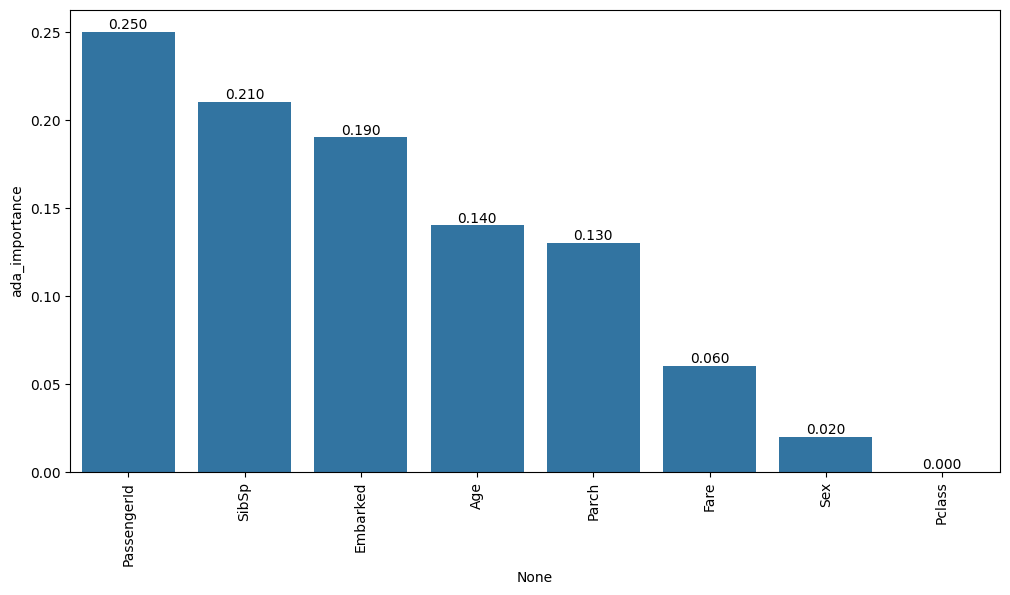

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

### AdaBoost Roc Curve

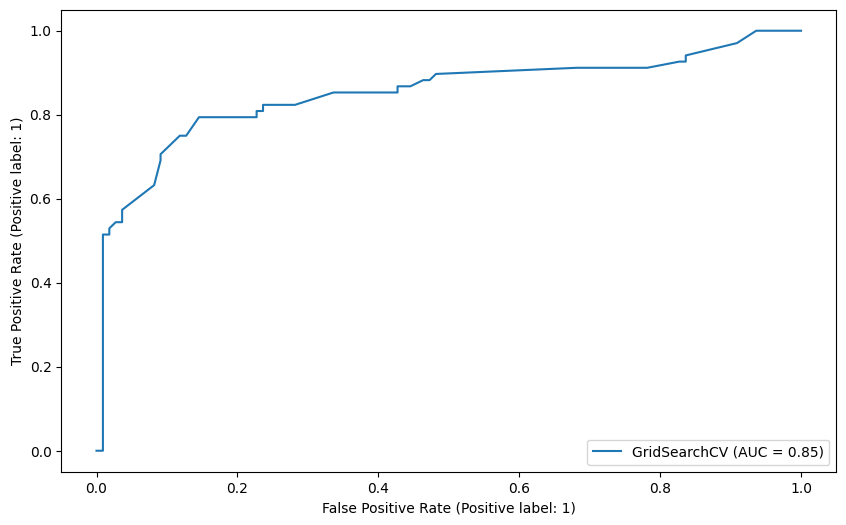

In [ ]:
RocCurveDisplay.from_estimator(ada_grid, X_test, y_test);

## Gradient Boosting

In [ ]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(random_state=101))]
grad_pipe = Pipeline(steps= operations)

In [ ]:
grad_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('grad_model', GradientBoostingClassifier(random_state=101))])

In [ ]:
y_pred = grad_pipe.predict(X_test)
grad_f1 = f1_score(y_test, y_pred)
grad_accuracy = accuracy_score(y_test, y_pred)
grad_auc = roc_auc_score(y_test, y_pred)

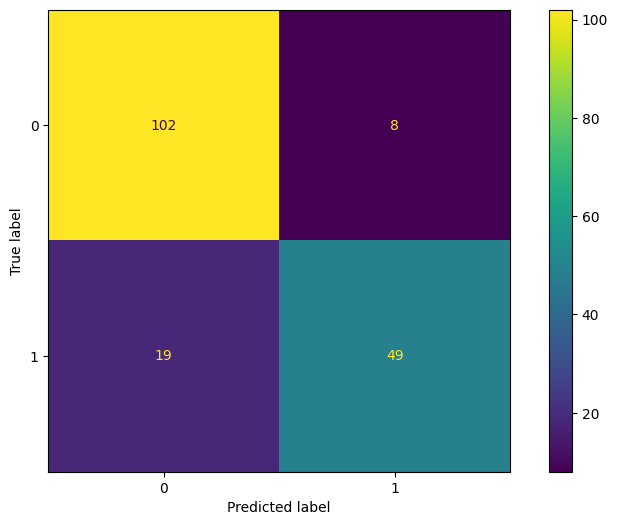

In [ ]:
ConfusionMatrixDisplay.from_estimator(grad_pipe, X_test, y_test);

In [ ]:
eval_metric(grad_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[102   8]
 [ 19  49]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.86      0.72      0.78        68

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178


Train_Set
[[421  18]
 [ 40 232]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       439
           1       0.93      0.85      0.89       272

    accuracy                           0.92       711
   macro avg       0.92      0.91      0.91       711
weighted avg       0.92      0.92      0.92       711



### GradientBoosting CV

In [ ]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(random_state=101))]
grad_pipe = Pipeline(steps= operations)

scores = cross_validate(grad_pipe, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.806
train_accuracy          0.920
test_precision_macro    0.803
train_precision_macro   0.923
test_recall_macro       0.784
train_recall_macro      0.907
test_f1_macro           0.788
train_f1_macro          0.914
dtype: float64

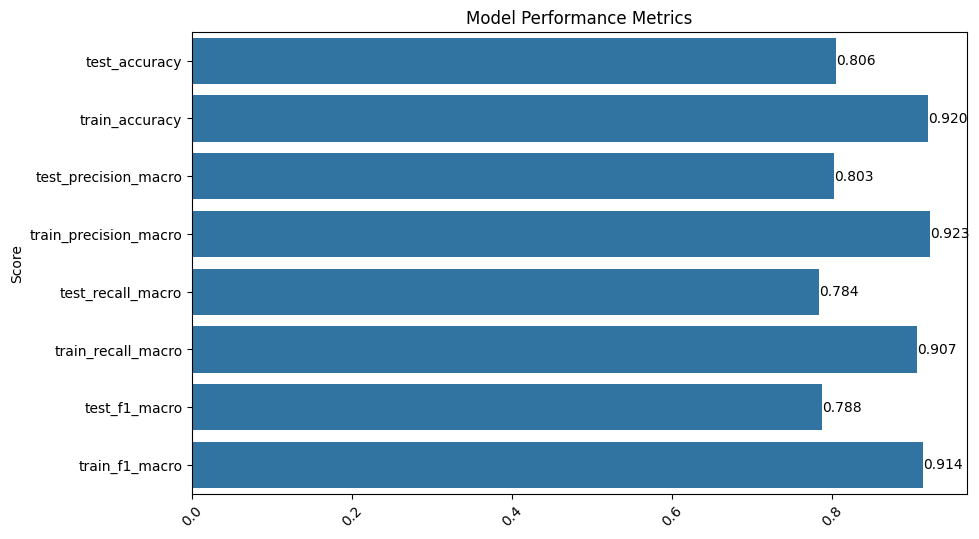

In [ ]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

### GradientBoosting Grid Search

In [ ]:
grad_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Sex', 'Embarked'])])),
  ('grad_model', GradientBoostingClassifier(random_state=101))],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['Sex', 'Embarked'])]),
 'grad_model': GradientBoostingClassifier(random_state=101),
 'column_trans__n_jobs': None,
 'column_trans__remainder': 'passthrough',
 'column_trans__sparse_threshold': 0.3,
 'column_trans__transformer_weights': None,
 'column_tr

In [ ]:
param_grid = {
    "grad_model__n_estimators": [100, 200, 300],
    "grad_model__subsample": [0.5, 0.8],
    "grad_model__max_features": [None, 2, 3],
    "grad_model__learning_rate": [0.01, 0.1, 0.5],
    "grad_model__max_depth": [2, 3, 4]
}

In [ ]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(random_state=101))]
grad_pipe = Pipeline(steps= operations)

grad_grid = GridSearchCV(grad_pipe, param_grid, scoring = "accuracy", n_jobs = -1)

grad_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('grad_model',
                                        GradientBoostingClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'grad_model__learning_rate': [0.01, 0.1, 0.5],
                         'grad_model__max_depth': [2, 3, 4],
                         'grad_model__max_features': [None, 2, 3],
                         'grad_model__n_estimators': [100, 200, 300],
                         'grad_model__subsample': [0.5, 0.8]},
             scoring='accuracy')

In [ ]:
grad_grid.best_estimator_

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('grad_model',
                 GradientBoostingClassifier(max_depth=4, max_features=2,
                                            random_state=101, subsample=0.8))])

### Grid CV

In [ ]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(learning_rate=0.01,
                                                                                       n_estimators=200,
                                                                                       random_state=101,
                                                                                       subsample=0.5))]
grad_pipe_CV = Pipeline(steps= operations)


scores = cross_validate(grad_pipe_CV, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.803
train_accuracy          0.845
test_precision_macro    0.804
train_precision_macro   0.851
test_recall_macro       0.773
train_recall_macro      0.819
test_f1_macro           0.780
train_f1_macro          0.830
dtype: float64

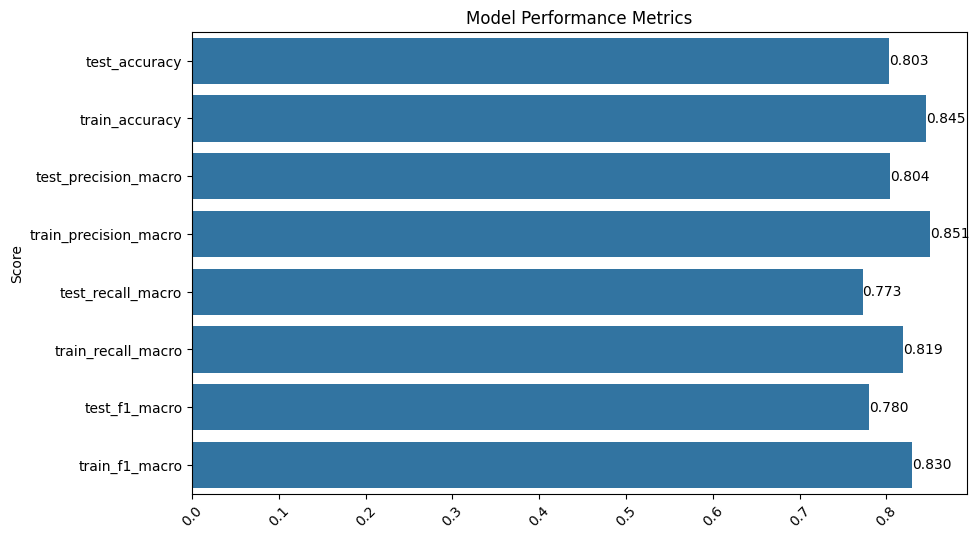

In [ ]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Metrics');

### GradientBoosting Best Score

In [ ]:
grad_grid.best_score_

0.8143110410716045

### GradientBoosting Feature Importancies

In [ ]:
operations = [('column_trans',column_trans), ('grad_model', GradientBoostingClassifier(random_state=101))]
grad_pipe = Pipeline(steps= operations)


grad_pipe.fit(X_train, y_train)
grad_pipe['grad_model'].feature_importances_

array([0.43688383, 0.00775554, 0.11116823, 0.13706233, 0.12543155,
       0.03786889, 0.00288711, 0.14094251])

In [ ]:
feats = pd.DataFrame(index=X.columns, data= grad_pipe['grad_model'].feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance", ascending = False)
grad_imp_feats

,grad_importance
PassengerId,0.437
Embarked,0.141
Age,0.137
SibSp,0.125
Sex,0.111
Parch,0.038
Pclass,0.008
Fare,0.003


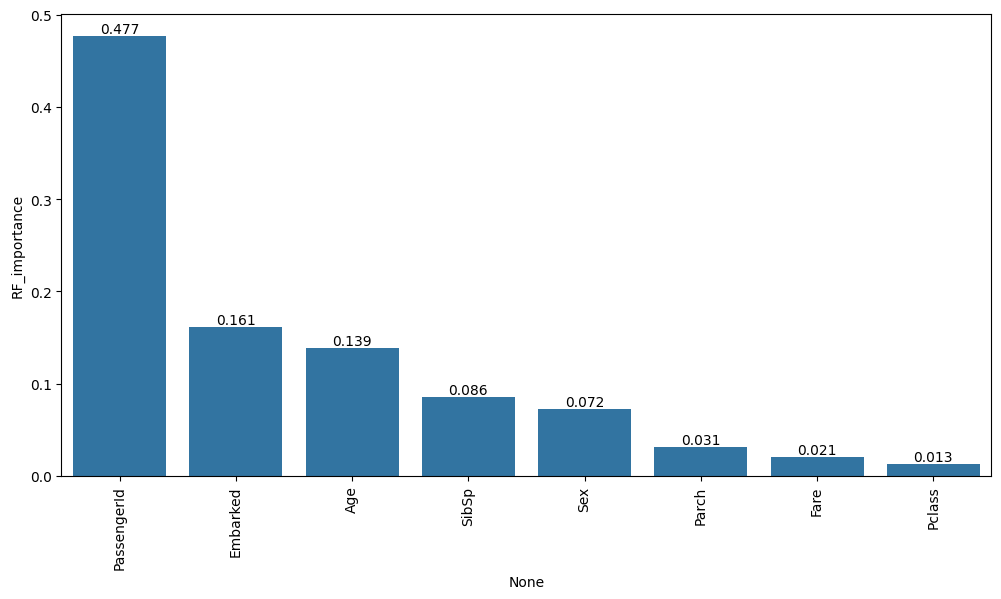

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=RF_imp_feats, x=RF_imp_feats.index, y='RF_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

### GradientBoosting Roc Curve

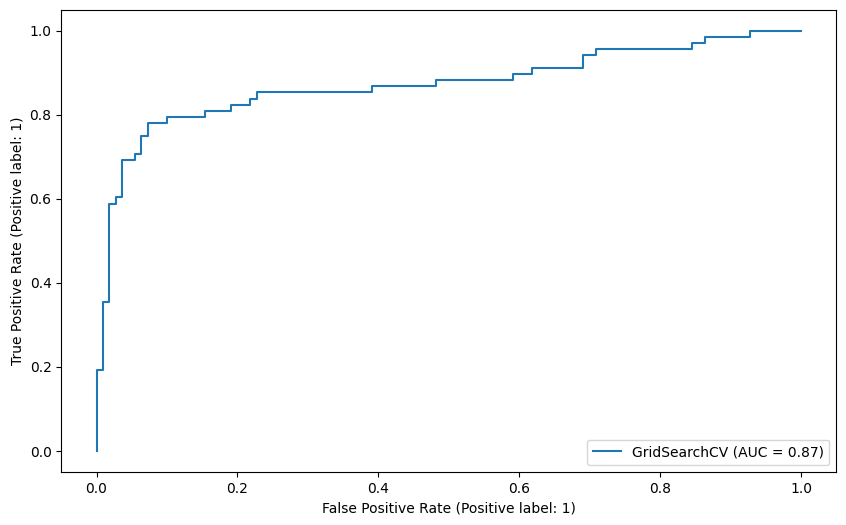

In [ ]:
RocCurveDisplay.from_estimator(grad_grid, X_test, y_test);

## XGBoost

In [ ]:
operations = [('column_trans',column_trans), ('xgb_model', XGBClassifier(random_state=101))]
xgb_pipe = Pipeline(steps= operations)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               ear...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=101, ...))])

In [ ]:
y_pred = xgb_pipe.predict(X_test)
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

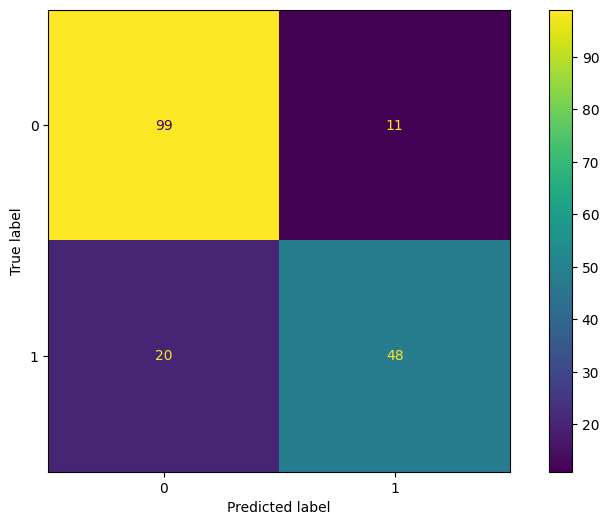

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_pipe, X_test, y_test);

In [ ]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[99 11]
 [20 48]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.81      0.71      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178


Train_Set
[[439   0]
 [  0 272]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       272

    accuracy                           1.00       711
   macro avg       1.00      1.00      1.00       711
weighted avg       1.00      1.00      1.00       711



### XGB CV

In [ ]:
operations = [('column_trans',column_trans), ('xgb_model', XGBClassifier(random_state=101))]
xgb_pipe = Pipeline(steps= operations)

scores = cross_validate(xgb_pipe, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.792
train_accuracy          1.000
test_precision_macro    0.787
train_precision_macro   1.000
test_recall_macro       0.773
train_recall_macro      1.000
test_f1_macro           0.774
train_f1_macro          1.000
dtype: float64

### XGB Grid Search

In [ ]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Sex', 'Embarked'])])),
  ('xgb_model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missi

In [ ]:
param_grid = {
    "xgb_model__n_estimators": [50, 100],
    "xgb_model__max_depth": [2, 3, 4],
    "xgb_model__learning_rate": [0.01, 0.05, 0.1],
    "xgb_model__subsample": [0.5, 0.8],
    "xgb_model__colsample_bytree": [0.5, 0.8, None]
}

In [ ]:
operations = [('column_trans',column_trans), ('xgb_model', XGBClassifier(random_state=101))]
xgb_pipe = Pipeline(steps= operations)

xgb_grid = GridSearchCV(xgb_pipe, param_grid, scoring = "accuracy", n_jobs = -1)

xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('xgb_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytr...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'xgb_model__colsample_bytree': [0.5, 0.8, None],
                         'xgb_model__learning_rate': [0.01, 0.05, 0.1],
                         'xgb_model__max_depth': [2, 3, 4],
                         'xgb_model__n_estimators': [50, 100],
                         'xgb_model__subsample': [0.5, 0.8]},
             scoring='accuracy')

In [ ]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[101   9]
 [ 20  48]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        68

    accuracy                           0.84       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178


Train_Set
[[400  39]
 [ 80 192]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       439
           1       0.83      0.71      0.76       272

    accuracy                           0.83       711
   macro avg       0.83      0.81      0.82       711
weighted avg       0.83      0.83      0.83       711



In [ ]:
xgb_grid.best_params_

{'xgb_model__colsample_bytree': 0.8,
 'xgb_model__learning_rate': 0.1,
 'xgb_model__max_depth': 2,
 'xgb_model__n_estimators': 50,
 'xgb_model__subsample': 0.8}

### Grid CV

In [ ]:
operations = [('column_trans',column_trans), ('xgb_model', XGBClassifier(random_state=101,
                                                                         colsample_bytree =None,
                                                                         learning_rate=0.05,
                                                                         max_depth=2,
                                                                         n_estimators=100,
                                                                         subsample=0.8))]
xgb_pipe_CV = Pipeline(steps= operations)


scores = cross_validate(xgb_pipe_CV, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.814
train_accuracy          0.841
test_precision_macro    0.815
train_precision_macro   0.844
test_recall_macro       0.787
train_recall_macro      0.816
test_f1_macro           0.795
train_f1_macro          0.825
dtype: float64

### XGB Best Score

In [ ]:
xgb_grid.best_score_

0.8128927410617551

### XGB Feature Importancies

In [ ]:
operations = [('column_trans',column_trans), ('xgb_model', XGBClassifier(random_state=101,
                                                                         colsample_bytree =None,
                                                                         learning_rate=0.05,
                                                                         max_depth=2,
                                                                         n_estimators=100,
                                                                         subsample=0.8))]
xgb_pipe = Pipeline(steps= operations)

xgb_pipe .fit(X_train, y_train)
xgb_pipe['xgb_model'].feature_importances_

array([0.45338812, 0.05145396, 0.05074372, 0.13816516, 0.08048832,
       0.06586876, 0.07657085, 0.08332112], dtype=float32)

In [ ]:
feats = pd.DataFrame(index=X.columns, data= xgb_pipe ['xgb_model'].feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending = False)
xgb_imp_feats

,xgb_importance
PassengerId,0.453
Age,0.138
Embarked,0.083
SibSp,0.080
Fare,0.077
Parch,0.066
Pclass,0.051
Sex,0.051


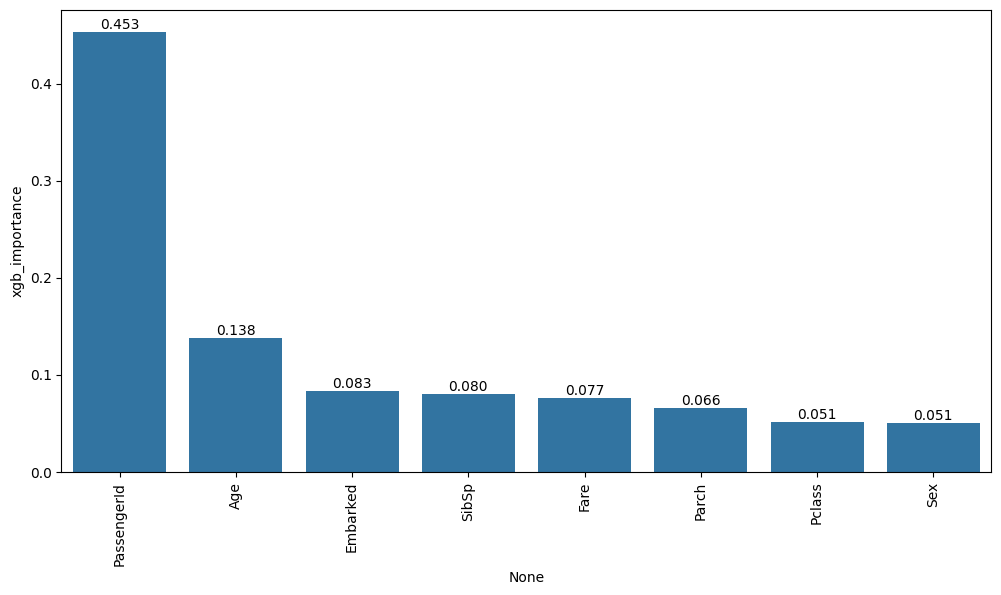

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

### XGB Roc Curve

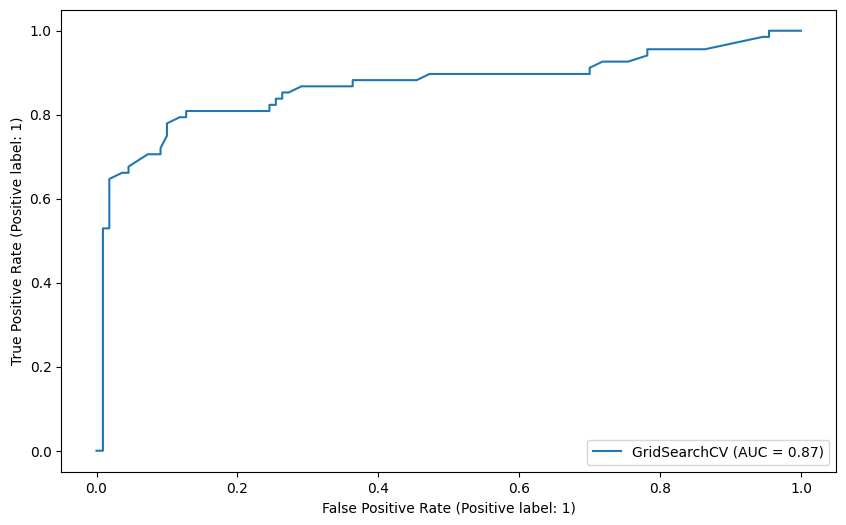

In [ ]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

## Light GBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=101))]
lgbm_pipe = Pipeline(steps= operations)

lgbm_pipe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 272, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382560 -> initscore=-0.478697
[LightGBM] [Info] Start training from score -0.478697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('lgbm_model', LGBMClassifier(random_state=101))])

In [ ]:
y_pred = lgbm_pipe.predict(X_test)
lgbm_f1 = f1_score(y_test, y_pred)
lgbm_accuracy = accuracy_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)

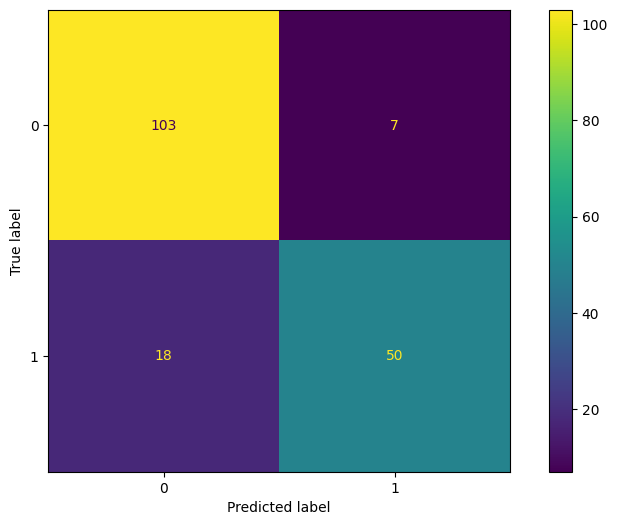

In [ ]:
ConfusionMatrixDisplay.from_estimator(lgbm_pipe, X_test, y_test);

In [ ]:
eval_metric(lgbm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[103   7]
 [ 18  50]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       110
           1       0.88      0.74      0.80        68

    accuracy                           0.86       178
   macro avg       0.86      0.84      0.85       178
weighted avg       0.86      0.86      0.86       178


Train_Set
[[437   2]
 [  0 272]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       0.99      1.00      1.00       272

    accuracy                           1.00       711
   macro avg       1.00      1.00      1.00       711
weighted avg       1.00      1.00      1.00       711



### Light GBM CV

In [ ]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=101))]
lgbm_pipe = Pipeline(steps= operations)

scores = cross_validate(lgbm_pipe, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[LightGBM] [Info] Number of positive: 244, number of negative: 395
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 639, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381847 -> initscore=-0.481718
[LightGBM] [Info] Start training from score -0.481718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


test_accuracy           0.797
train_accuracy          0.997
test_precision_macro    0.791
train_precision_macro   0.997
test_recall_macro       0.778
train_recall_macro      0.997
test_f1_macro           0.780
train_f1_macro          0.997
dtype: float64

### Light GBM Grid Search

In [ ]:
lgbm_pipe.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Sex', 'Embarked'])])),
  ('lgbm_model', LGBMClassifier(random_state=101))],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['Sex', 'Embarked'])]),
 'lgbm_model': LGBMClassifier(random_state=101),
 'column_trans__n_jobs': None,
 'column_trans__remainder': 'passthrough',
 'column_trans__sparse_threshold': 0.3,
 'column_trans__transformer_weights': None,
 'column_trans__transformers': [('o

In [ ]:
param_grid = {'lgbm_model__learning_rate': [0.1, 1],
              'lgbm_model__n_estimators': [50, 100, 200],
              'lgbm_model__num_leaves': [20, 30, 50],
              'lgbm_model__max_depth': [-1, 3, 4, 5],
              'lgbm_model__subsample': [0.8, 1.0],
              'lgbm_model__colsample_bytree': [0.8, 1.0]}

In [ ]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=101))]
lgbm_pipe = Pipeline(steps= operations)

lgbm_grid = GridSearchCV(lgbm_pipe, param_grid, scoring = "accuracy", n_jobs = -1)

lgbm_grid.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 272, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382560 -> initscore=-0.478697
[LightGBM] [Info] Start training from score -0.478697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('lgbm_model',
                                        LGBMClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'lgbm_model__colsample_bytree': [0.8, 1.0],
                         'lgbm_model__learning_rate': [0.1, 1],
                         'lgbm_model__max_depth': [-1, 3, 4, 5],
                         'lgbm_model__n_estimators': [50, 100, 200],
                         'lgbm_model__num_leaves': [20, 30, 50],
                         'lgbm_model__subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[104   6]
 [ 22  46]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       110
           1       0.88      0.68      0.77        68

    accuracy                           0.84       178
   macro avg       0.86      0.81      0.82       178
weighted avg       0.85      0.84      0.84       178


Train_Set
[[412  27]
 [ 81 191]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       439
           1       0.88      0.70      0.78       272

    accuracy                           0.85       711
   macro avg       0.86      0.82      0.83       711
weighted avg       0.85      0.85      0.84       711



In [ ]:
lgbm_grid.best_params_

{'lgbm_model__colsample_bytree': 0.8,
 'lgbm_model__learning_rate': 0.1,
 'lgbm_model__max_depth': 3,
 'lgbm_model__n_estimators': 50,
 'lgbm_model__num_leaves': 20,
 'lgbm_model__subsample': 0.8}

### Grid CV

In [ ]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=101,
                                                                         colsample_bytree =0.8,
                                                                         learning_rate=0.1,
                                                                         max_depth=3,
                                                                         n_estimators=50,
                                                                         subsample=0.8))]
lgbm_pipe_CV = Pipeline(steps= operations)


scores = cross_validate(lgbm_pipe_CV, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[LightGBM] [Info] Number of positive: 244, number of negative: 395
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 639, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381847 -> initscore=-0.481718
[LightGBM] [Info] Start training from score -0.481718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


test_accuracy           0.804
train_accuracy          0.852
test_precision_macro    0.808
train_precision_macro   0.859
test_recall_macro       0.774
train_recall_macro      0.826
test_f1_macro           0.782
train_f1_macro          0.837
dtype: float64

### Light GBM Best Score

In [ ]:
lgbm_grid.best_score_

0.819925145277258

### Light GBM Feature Importancies

In [ ]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=101,
                                                                         colsample_bytree =0.8,
                                                                         learning_rate=0.1,
                                                                         max_depth=3,
                                                                         n_estimators=50,
                                                                         subsample=0.8))]
lgbm_pipe = Pipeline(steps= operations)

lgbm_pipe .fit(X_train, y_train)
lgbm_pipe['lgbm_model'].feature_importances_

[LightGBM] [Info] Number of positive: 272, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382560 -> initscore=-0.478697
[LightGBM] [Info] Start training from score -0.478697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


array([29,  6, 37, 30, 68, 23,  6, 80], dtype=int32)

In [ ]:
feats = pd.DataFrame(index=X.columns, data=lgbm_pipe['lgbm_model'].feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance", ascending = False)
lgbm_imp_feats

,lgbm_importance
Embarked,80
SibSp,68
Sex,37
Age,30
PassengerId,29
Parch,23
Pclass,6
Fare,6


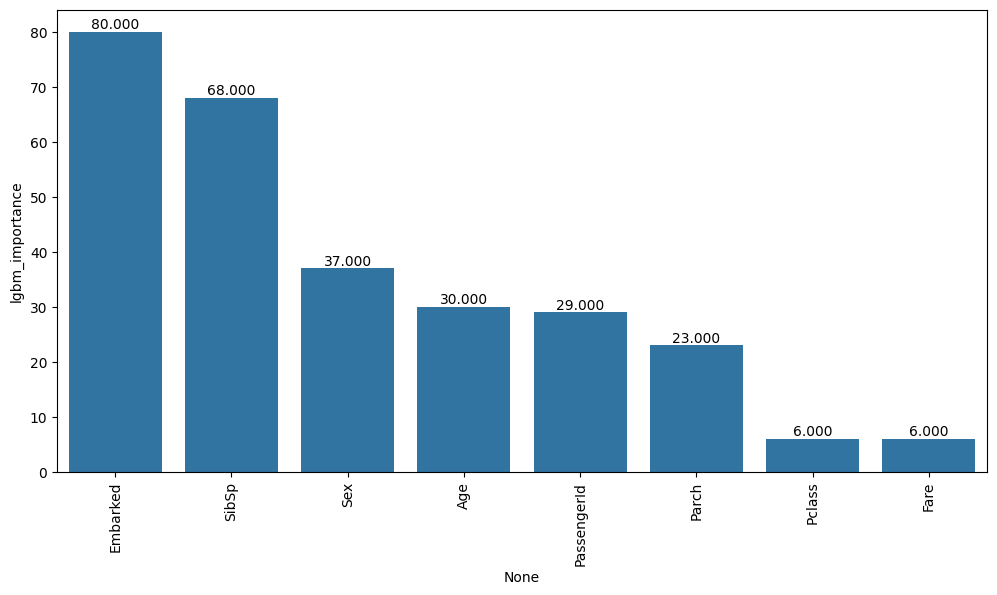

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

### Light GBM Roc Curve

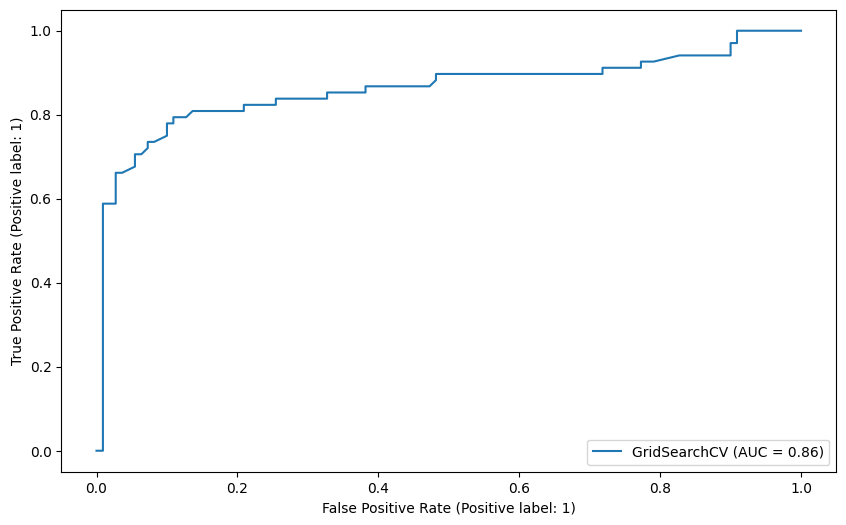

In [ ]:
RocCurveDisplay.from_estimator(lgbm_grid, X_test, y_test);

## Comparing Models

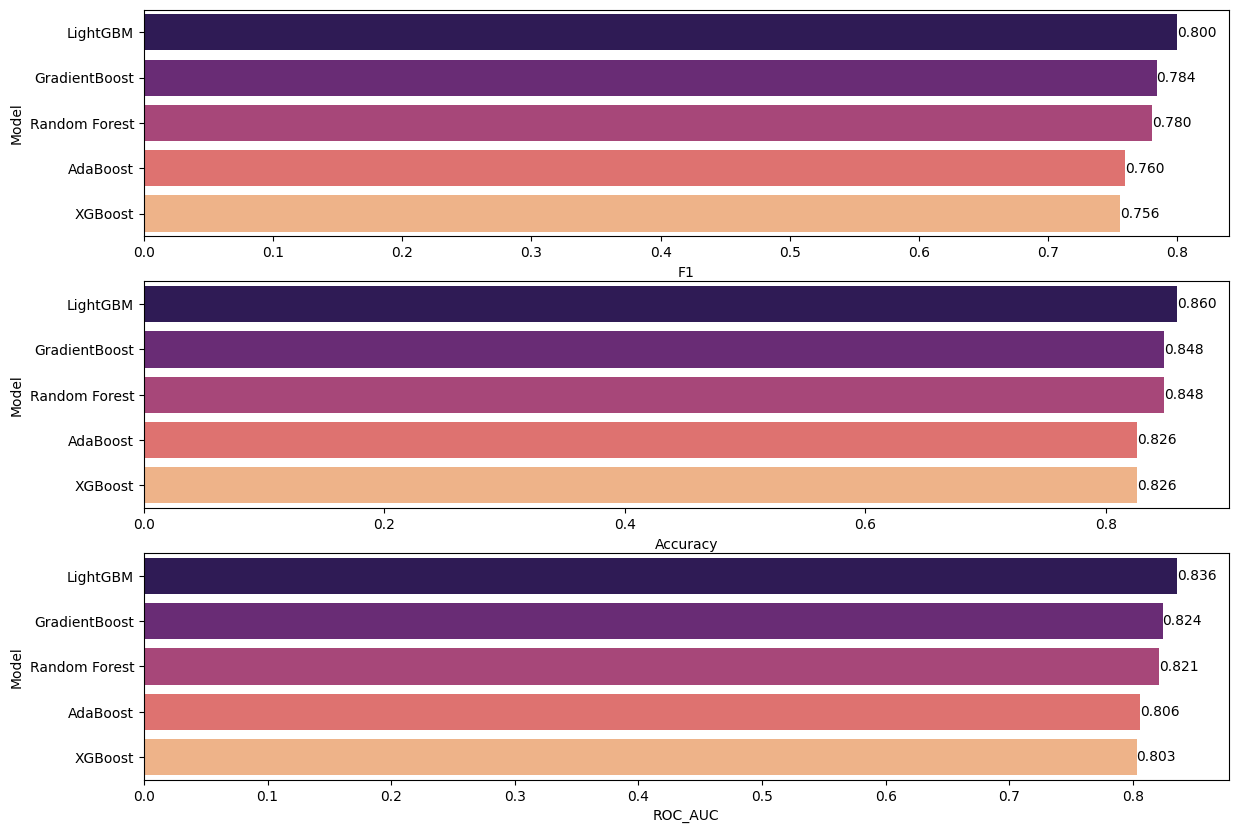

In [ ]:
compare = pd.DataFrame({"Model": ["Random Forest", "AdaBoost", "GradientBoost", "XGBoost", "LightGBM"],
                        "F1": [RF_f1, ada_f1, grad_f1, xgb_f1, lgbm_f1],
                        "Accuracy": [RF_accuracy, ada_accuracy, grad_accuracy, xgb_accuracy, lgbm_accuracy],
                        "ROC_AUC": [RF_auc, ada_auc, grad_auc, xgb_auc, lgbm_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)
plt.show()

## Final Model - Light GBM

In [ ]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000,1,0,7.250,S
1,2,1,female,38.000,1,0,71.283,C
2,3,3,female,26.000,0,0,7.925,S
3,4,1,female,35.000,1,0,53.100,S
4,5,3,male,35.000,0,0,8.050,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000,1,0,7.250,S
1,2,1,1,female,38.000,1,0,71.283,C
2,3,1,3,female,26.000,0,0,7.925,S
3,4,1,1,female,35.000,1,0,53.100,S
4,5,0,3,male,35.000,0,0,8.050,S


In [ ]:
operations = [('column_trans',column_trans), ('lgbm_model', LGBMClassifier(random_state=101,
                                                                         colsample_bytree =0.8,
                                                                         learning_rate=0.1,
                                                                         max_depth=3,
                                                                         n_estimators=50,
                                                                         subsample=0.8))]
Final_lgbm_pipe = Pipeline(steps= operations)


In [ ]:
Final_lgbm_pipe.fit(X, y)

[LightGBM] [Info] Number of positive: 340, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 889, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382452 -> initscore=-0.479153
[LightGBM] [Info] Start training from score -0.479153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex', 'Embarked'])])),
                ('lgbm_model',
                 LGBMClassifier(colsample_bytree=0.8, max_depth=3,
                                n_estimators=50, random_state=101,
                                subsample=0.8))])

In [ ]:
test_data = pd.read_csv("/content/test.csv")

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [ ]:
test_data.shape

(418, 11)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
gender_submission = pd.read_csv("/content/gender_submission.csv")

In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
gender_submission.shape

(418, 2)

In [ ]:
gender_submission['my_prediction'] = Final_lgbm_pipe.predict(test_data)

In [ ]:
gender_submission.head(20)

,PassengerId,Survived,my_prediction
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,0
5,897,0,0
6,898,1,1
7,899,0,0
8,900,1,1
9,901,0,0


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'gender_submission' with the columns 'Survived' and 'my_prediction'

def count_unequal_values(df, column1, column2):
    # Count the number of unequal values
    num_unequal_values = (df[column1] != df[column2]).sum()
    return num_unequal_values




In [ ]:
num_unequal = count_unequal_values(gender_submission, 'Survived', 'my_prediction')
print("Number of unequal values:", num_unequal)

Number of unequal values: 110


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'gender_submission' with the columns 'Survived' and 'my_prediction'

def count_equal_values(df, column1, column2):
    # Count the number of unequal values
    num_equal_values =(df[column1] == df[column2]).sum()
    return num_equal_values


In [ ]:
num_equal = count_equal_values(gender_submission, 'Survived', 'my_prediction')
print("Number of equal values:", num_equal)

Number of equal values: 308


**Out of 418 rows of data, 110 of them have been incorrectly predicted, and 308 have been correctly predicted.**

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THE END</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |